In [40]:
'-------------------------------- Load in regular libraries ------------------------------------'
import numpy as np
import matplotlib.pyplot as plt
import random
from IPython.display import clear_output
import os
from abc import ABC, abstractmethod

In [41]:
import numpy as np
import random

class Data_Generation():
    
    '-------------------------------- Initialize Class ------------------------------------'
    def __init__(self):
        pass
    
    
    '-------------------------------- Generate Linear Regression data ------------------------------------'
    def _data_generation_linear_regression(self, nrows : float = 300, ncols : float = 20, noise_addition : bool = True) -> np.ndarray:

        """
        Args:
             nrows          : number of rows for data matrix X.
             ncols          : number of cols for data matrix X.
             noise_addition : add noise to output vector y (True/False).

        """

        # Create matrix with uniformly random variables:
        X = np.random.uniform(low = 0, high = 1, size = (nrows, ncols))    

        # Weight vector w and noise:  
        w = np.random.uniform(low = 0, high = 1, size = (ncols, 1))      
        y = np.matmul(X, w)

        # noise addition of selected
        if noise_addition:
            noise = np.random.normal(loc = 0, scale = 1, size = (nrows, 1))   
            y    += noise

        return X, w, y

    
    '-------------------------------- Generate Classifier data ------------------------------------'
    def _data_generation_classifier(self, nrows : float = 100, ncols : float = 10) -> np.ndarray:

        """
        Args:
             nrows          : number of rows for data matrix X.
             ncols          : number of cols for data matrix X.
             noise_addition : add noise to output vector y (True/False).

        """

        # Create matrix with uniformly random variables:
        X = np.random.normal(loc = 0, scale = 1, size = (nrows, ncols))   

        # Weight vector w and noise:  
        w = np.random.normal(loc = 0, scale = 1, size = (ncols, 1))

        # Create output vector y:
        y = np.zeros(nrows)

        for i in range(nrows):
            y[i] = np.sign(np.matmul(X[i, :].T, w))


        return X, w, y
    

    '-------------------------------- Split Data ------------------------------------'
    def _data_splitting(self, X : np.ndarray, y : np.ndarray, mode : str, nrows_train : float, seed  = 0, random = False) -> np.ndarray:

        """
        Args:
             X           : data matrix X.
             y           : output vector y.
             mode        : mode for splitting -> ratio takes a percentage of the available rows and index splits the data untill the given index value.
             nrows_train : in case of mode ratio give a value between 0 and 1 and in case of mode index give an index value between 0 and max nr. of rows of matrix X (or vector y)

        """

        # Initialize train and test sets:
        X_train   = np.zeros((1, X.shape[1]))
        y_train   = np.zeros(1)

        X_test    = np.zeros((1, X.shape[1]))
        y_test    = np.zeros(1)

        # Select total rows of matrix X
        nrows_tot = X.shape[0]

        # Split data set:
        match mode:
            case 'ratio':

                if (nrows_train > 0) & (nrows_train <= 1):
                    
                    if nrows_train*nrows_tot % 1 > 0:
                        print(f'For the given value of nrows_train a remainder has been found of {nrows_train*nrows_tot % 1}. Therefore, the ratio has been adjusted to: {int(nrows_tot*nrows_train)/nrows_tot}.')

                    if random:

                        rng = np.random.default_rng(seed)
                        train_size = int(nrows_tot * nrows_train)

                        # random train indices
                        train_idx = rng.choice(nrows_tot, size=train_size, replace=False)

                        # test indices = complement of train indices
                        test_idx = np.setdiff1d(np.arange(nrows_tot), train_idx)

                        # split
                        X_train, y_train = X[train_idx], y[train_idx]
                        X_test,  y_test  = X[test_idx],  y[test_idx]
                    else:
                        X_train = X[0 : int(nrows_tot*nrows_train), :]
                        y_train = y[0 : int(nrows_tot*nrows_train)]

                        # Generate test set:
                        X_test  = X[int(nrows_tot*nrows_train):, :]
                        y_test  = y[int(nrows_tot*nrows_train):]    


                else:
                    print('The parameter "nrows_train" has to be between 0 and 1 for mode: ratio')


            case 'index':

                if (nrows_train > 0) & (nrows_train <= nrows_tot):

                    # Generate train set:
                    X_train = X[0 : nrows_train, :]
                    y_train = y[0 : nrows_train]

                    # Generate test set:
                    X_test  = X[nrows_train:, :]
                    y_test  = y[nrows_train:]    


                else:
                    print('The parameter "nrows_train" has to be between 0 and max nr. of rows of X for mode: index')

            case _:

                print('Please select either the "ratio" or "columns" mode.')


        return X_train, y_train, X_test, y_test

    '-------------------------------- Addition of multicolinearities ------------------------------------'
    def _multicolinearities_addition(self, X : np.ndarray, N_multicolinear_columns : int = 200) -> np.ndarray:

        """
        Args:
             X                       : data matrix X.
             N_multicolinear_columns : Number of multicolinear columns to be generated.

        """

        # Initialize multicolinear column matrix:
        multicolinear_columns   = np.zeros((X.shape[0], N_multicolinear_columns))

        for n in range(N_multicolinear_columns):

            # initialize multicolinear column:
            multicolinear_column = np.zeros((1, X.shape[0]))

            # Create a multicolinear column by making a linear combination of existing columns of X:
            for _ in range(random.randint(2, 10)):

                # Select random column:
                i = random.randint(0, X.shape[1] - 1)

                # Select random magnitude:
                k = random.uniform(-1, 1) 

                # Generate multicolinear column:
                multicolinear_column += k*np.array(X[:, i])

            # Add Gaussian Noise:
            multicolinear_column += np.random.normal(loc = 0, scale = 1, size = (1, X.shape[0]))

            # Fill multicolinear column matrix:
            multicolinear_columns[:, n] = multicolinear_column 

        return multicolinear_columns
    
    '-------------------------------- Addition of superifical columns ------------------------------------'
    def _superficial_addition(self, nrows : float = 300, ncols : float = 20) -> np.ndarray:

        """
        Args:
             nrows          : number of rows for data matrix X.
             ncols          : number of cols for data matrix X.

        """

        # Create matrix with uniformly random variables:
        superficial_columns = np.random.normal(loc = 0, scale = 1, size = (nrows, ncols))   

        return superficial_columns
    
    '-------------------------------- Dataset to make it hard for OLS ------------------------------------'
    def make_ols_tricky_separable(
        self,
        n_pos=120,                 # majority (+1)
        n_neg=40,                  # minority (−1)
        ncols=20,                  # feature dimension
        margin=0.1,                # small margin  means close along separator
        scale_pos=1.0,             # variance scale for +1 class
        scale_neg=2.0,             # variance scale for −1 class 
        outlier_frac=0.05,         # fraction of each class as far outliers (same side)
        outlier_multiplier=12.0,   # how far to push outliers along their side
        seed=None
    ):
        """
        Notes:
            - Data are strictly linearly separable (we enforce a tiny positive margin).
            - OLS performs poorly due to: small margin, imbalance, variance mismatch, and far outliers.
            - Logistic / hinge focus on margin and are less swayed by far, easy points.
        """
        
        rng = np.random.default_rng(seed)

        # Choose a random separating direction w (unit vector), bias b = 0
        w = rng.normal(size=ncols)
        w /= (np.linalg.norm(w) + 1e-12)

        # Place class means near the boundary along w to make the margin small
        d = margin * min(scale_pos, scale_neg)
        mu_pos = (+0.5 * d) * w
        mu_neg = (-0.5 * d) * w

        # Sample from Gaussians with different variances (imbalance via n_pos vs n_neg)
        X_pos = mu_pos + rng.normal(scale=scale_pos, size=(n_pos, ncols))
        X_neg = mu_neg + rng.normal(scale=scale_neg, size=(n_neg, ncols))

        # Add outliers on the *correct* side 
        def add_outliers(X, y_sign, frac, mult):
            if frac <= 0: return X
            k = max(1, int(len(X) * frac))
            idx = rng.choice(len(X), size=k, replace=False)
            # push along the class side: +w for +1, -w for -1
            X[idx] = X[idx] + (mult * y_sign) * w
            return X

        X_pos = add_outliers(X_pos, +1, outlier_frac, outlier_multiplier)
        X_neg = add_outliers(X_neg, -1, outlier_frac, outlier_multiplier)

        #  Stack and label
        X = np.vstack([X_pos, X_neg])
        y = np.concatenate([np.ones(n_pos, dtype=float), -np.ones(n_neg, dtype=float)])

        # Ensure strict linear separability with a tiny positive margin epsilon
        # If any sample violates y*(w·x) > 0, nudge minimally along y*w.
        proj = (X @ w) * y
        eps = 1e-3
        need = eps - proj
        mask = need > 0
        if np.any(mask):
            # Move only along w, just enough to satisfy y*(w·x) >= eps
            X[mask] += (need[mask].reshape(-1, 1) * (y[mask].reshape(-1, 1) * w))

        return X, y, w
    
    
import numpy as np

class DirectSolver():
    
    " ------------------------ Initialize Class ------------------------"
    def __init__(self):
        pass
    
    
    " ----------------------- Cholesky Factorization -------------------------"
    def _cholesky_decomposition(self, X : np.ndarray) -> np.ndarray:
        
        """
        Args:
             X : data matrix X.

        """

        C = np.zeros_like(X)

        for k in range(X.shape[0]):

            C[k, k] = np.sqrt(X[k, k] - np.sum(C[k, :k]**2))

            for i in range(k + 1, X.shape[0]):
                C[i, k] = (1/C[k, k])*(X[i, k] - np.sum(C[i, :k]*C[k, :k]))
                
        return C, C.transpose()    
    
        
    " ----------------------- LU Factorization -------------------------"
    def _LU_factorization(self, X : np.ndarray) -> np.ndarray:

        """
        Args:
             X : data matrix X.

        """

        # Check of matrix is square
        if not X.shape[0] == X.shape[1]:
            raise ValueError('Input matrix must be square')

        # Initialize L-Matrix:
        L = np.zeros_like(X)
        np.fill_diagonal(L,1)

        # Initialize U-matrix:
        U = np.copy(X)

        for i in range(X.shape[0] - 1):
            for j in range(i + 1, X.shape[0]):

                L[j, i]  = U[j, i]/U[i, i] 
                U[j, i:] = U[j, i:] - L[j, i]*U[i, i:]
                U[j, i]  = 0

        return L, U
    
    
    " ----------------------- QR Factorization -------------------------"
    def _QR_factorization(self, X : np.ndarray) -> np.ndarray:
        
        """
        Args:
             X : data matrix X.

        """

        # Initialize matrices:
        Q = np.zeros((X.shape[0], X.shape[1]))
        R = np.zeros((X.shape[1], X.shape[1]))


        # Create orthogonal matrix by Gram-Schmidt process:
        for i in range(X.shape[1]):
            r = np.array(X[:, i]) # -> Use copy/create array! Since this is a reference to a slice!

            for j in range(i):
                r -= np.dot(r, Q[:, j])*Q[:, j]

            Q[:, i] = r/np.linalg.norm(r)

        # Create upper-triangular matrix R:
        for i in range(X.shape[1]):
            for j in range(i + 1):
                R[j, i] = np.dot(X[:, i], Q[:, j])        

        return Q, R        

    
    " ----------------------- Forward Substitution -------------------------"
    def _forward_substitution(self, L : np.ndarray, y : np.ndarray) -> np.ndarray:

        """
        Args:
             L : lower triangular matrix L.
             y : output vector y

        """

        q = np.copy(y)

        for i in range(y.shape[0]):  

            for j in range(i):
                q[i] = q[i] - (L[i, j]*q[j])

            q[i] = q[i] / L[i, i]

        return q
    
    
    " ----------------------- Backward Substitution -------------------------"
    def _backward_substitution(self, U : np.ndarray, q : np.ndarray) -> np.ndarray:

        """
        Args:
             U : upper triangular matrix L.
             y : output vector y

        """

        w = np.zeros_like(q)

        for i in range(w.shape[0], 0, -1):
            w[i - 1] = (q[i - 1] - np.dot(U[i - 1, i:], w[i:]))/U[i - 1, i - 1]

        return w
    
    
    " ----------------------- Solver -------------------------"
    def _solver(self, X : np.ndarray, y : np.ndarray, mode : str = 'LU') -> np.ndarray:    
        
        match mode:
            
            case 'LU':
                L, U = self._LU_factorization(X)
            
            case 'Cholesky':
                L, U = self._cholesky_decomposition(X)
                        
        # Forward substitution:
        q = self._forward_substitution(L, y)
        
        # Backward substitution:
        w = self._backward_substitution(U, q)
        
        return L, U, q, w
    
'-------------------------------- Load custom classes ------------------------------------'
class Models(DirectSolver):
    
    '-------------------------------- Initialize Class ------------------------------------'
    def __init__(self):
        # Initialize the parent DirectSolver class
        super().__init__()
    
    " ---------------------------------------- Ordinary Least Squares Method ---------------------------------------------- "
    def _ordinary_least_squares(self, X_train : np.ndarray, X_test : np.ndarray, y_train : np.ndarray, 
                                y_test : np.ndarray, mode : str = 'Cholesky', 
                                print_statement : bool = False) -> np.ndarray:
        """
        Args:
             mode            : Mode for (direct) Matrix solver.
             X_train         : Train set for data matrix X.
             X_test          : Test set for data matrix X.
             y_train         : Output vector y for trainset.
             y_test          : Output vector y for testset.
             print_statement : Print Loss function output.
        """
        # Add bias (ones) to the training and test data
        X_train_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]
        X_test_b = np.c_[np.ones((X_test.shape[0], 1)), X_test]

        A = X_train_b.T @ X_train_b
        b = X_train_b.T @ y_train
        
        L, U, q, w = self._solver(A, b, mode=mode)
        # cost func
        J_train = (1/2)*np.linalg.norm(X_train_b @ w - y_train)**2
        J_test  = (1/2)*np.linalg.norm(X_test_b @ w - y_test)**2

        if print_statement:
            print(f'OLS J_train(w) = {J_train}')
            print(f'OLS J_test(w) = {J_test}')

        return J_train, J_test, w
    
    " ---------------------------------------- Ridge Regression Method ---------------------------------------------- "
    def _ridge_regression(self, X_train : np.ndarray, X_test : np.ndarray, y_train : np.ndarray, 
                          y_test : np.ndarray, mode : str = 'Cholesky', lam : float = 1, 
                          print_statement : bool = False) -> np.ndarray:
        """
        Args:
             mode            : Mode for (direct) Matrix solver.
             X_train         : Train set for data matrix X.
             X_test          : Test set for data matrix X.
             y_train         : Output vector y for trainset.
             y_test          : Output vector y for testset.
             print_statement : Print Loss function output.
             lam             : Lambda value.
        """
        # Add bias (ones) to the training and test data
        X_train_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]
        X_test_b = np.c_[np.ones((X_test.shape[0], 1)), X_test]
        
        # Regularization matrix, the identity matrix scaled by lambda.
        regularization_matrix = lam * np.identity(X_train_b.shape[1])
        
        # Set the first element to 0 to NOT regularize the bias term.
        regularization_matrix[0, 0] = 0
        
        # Ridge solution using the normal equation.
        A = X_train_b.T @ X_train_b + regularization_matrix
        b = X_train_b.T @ y_train
        L, U, q, w = self._solver(A, b, mode=mode)
        
        # weights w include the bias term w[0] and feature weights w[1:]
        weights_only = w[1:]

        J_train = (1/2)*np.linalg.norm(X_train_b @ w - y_train)**2 + (lam/2)*np.linalg.norm(weights_only)**2
        J_test  = (1/2)*np.linalg.norm(X_test_b @ w - y_test)**2 + (lam/2)*np.linalg.norm(weights_only)**2

        if print_statement:
            print(f'Ridge J_train(w) = {J_train}')
            print(f'Ridge J_test(w) = {J_test}')

        return J_train, J_test, w
    
    " ---------------------------------------- Hinge-Loss Classifier Training ---------------------------------------------- "
    def _train_hinge_loss(self, X_train : np.ndarray, y_train : np.ndarray, 
                          X_test : np.ndarray, y_test : np.ndarray, 
                          lam : float, learning_rate: float, train_steps: int):
        dimension = X_train.shape[1]
        model = HingeLossClassification(dimension, lam, learning_rate)
        
        loss_history = []
        test_loss_history = []
        
        for _ in range(train_steps):
            # full training step: forward, backward, and parameter update
            train_loss = model.forward(X_train, y_train)
            model.backward()
            model.step()
            
            # create a temporary HingeLoss object for test loss w/o corrupting cache for backprop
            temp_model = HingeLossClassification(dimension, lam, learning_rate)
            temp_model.weight = model.weight # Use current weights for eval
            test_loss = temp_model.forward(X_test, y_test)
            
            loss_history.append(train_loss)
            test_loss_history.append(test_loss)
            
        return model, loss_history, test_loss_history

    " ---------------------------------------- Log-Loss Classifier Training ---------------------------------------------- "
    def _train_logistic_loss(self, X_train : np.ndarray, y_train : np.ndarray, 
                             X_test : np.ndarray, y_test : np.ndarray, 
                             lam : float, learning_rate: float, train_steps: int):
        dimension = X_train.shape[1]
        model = LogisticLossClassification(dimension, lam, learning_rate)
        
        loss_history = []
        test_loss_history = []
        
        for _ in range(train_steps):
            # full training step: forward, backward, and parameter update
            train_loss = model.forward(X_train, y_train)
            model.backward()
            model.step()
            
            # calculate test loss for monitoring w/o corrupting the cache
            temp_model = LogisticLossClassification(dimension, lam, learning_rate)
            temp_model.weight = model.weight # Use current weights for eval
            test_loss = temp_model.forward(X_test, y_test)
            
            loss_history.append(train_loss)
            test_loss_history.append(test_loss)
            
        return model, loss_history, test_loss_history

# class defining common loss interface
class Loss(ABC):
    def __init__(self, dimension, l, learning_rate):
        self.dimension = dimension
        self.l = l
        self.learning_rate = learning_rate
        # Initialize weights w/ a bias term.
        self.weight = np.random.uniform(low=-0.1, high=0.1, size=(dimension + 1, 1))
        self.cache = None
        self.grad = None

    @abstractmethod
    def forward(self, X, y):
        pass
    
    @abstractmethod
    def backward(self):
        pass

    def step(self):
        self.weight -= self.learning_rate * self.grad

class HingeLossClassification(Loss):
    def forward(self, X, y):
        # Add bias term to X.
        X_b = np.c_[np.ones((X.shape[0], 1)), X]
        y = y.reshape(-1, 1) # ensure column vector and not (N,)
        output = X_b @ self.weight
        margins = 1 - y * output
        loss = np.maximum(0, margins)
        # Regularize just the weights, not bias.
        regularization = 0.5 * self.l * np.sum(self.weight[1:]**2) 
        self.cache = (X_b, y, margins)
        return (loss.sum() / X.shape[0]) + regularization

    def backward(self):
        X_b, y, margins = self.cache
        indicator = (margins > 0).astype(float)
        grad_loss = -(X_b.T @ (indicator * y)) / X_b.shape[0]
        reg_grad = self.l * self.weight
        reg_grad[0] = 0 # Don't regularize the bias term.
        self.grad = grad_loss + reg_grad
        return self.grad
    
class LogisticLossClassification(Loss):
    def forward(self, X, y):
        # Add bias term to X
        X_b = np.c_[np.ones((X.shape[0], 1)), X]
        y = y.reshape(-1, 1) # ensure column vector and not (N,)
        output = X_b @ self.weight
        logits = -y * output
        loss_vec = np.logaddexp(0.0, logits)
        # Regularize just the weights
        regularization = 0.5 * self.l * np.sum(self.weight[1:]**2) 
        self.cache = (X_b, y, output)
        return (loss_vec.sum() / X.shape[0]) + regularization

    def backward(self):
        X_b, y, output = self.cache
        probs = 1.0 / (1.0 + np.exp(y * output))
        grad_loss = -(X_b.T @ (y * probs)) / X_b.shape[0]
        reg_grad = self.l * self.weight
        reg_grad[0] = 0 # Don't regularize the bias term
        self.grad = grad_loss + reg_grad
        return self.grad
    
import numpy as np

class MatrixProperties():
    
    " ------------------------ Initialize Class ------------------------"
    def __init__(self):
        pass
    
    " ------------------------ Compute Condition Number ------------------------"
    def _condition_number(self, X : np.ndarray) -> float:

        """
        Args:
             X : data matrix X.

        """

        # np.matmul(X.transpose(), X)
        eigenvalues, eigenvectors = np.linalg.eig(X)

        # condition number:
        kappa = np.sqrt(max(eigenvalues))/np.sqrt(min(eigenvalues))

        print(f'Condition number of the matrix is: {kappa}')

        return kappa
    
    " ------------------------ Compute Matrix Rank ------------------------"
    def _rank(self, X : np.ndarray) -> float:
        
        """
        Args:
             X : data matrix X.

        """
        
        rank = np.linalg.matrix_rank(X)
        
        if X.shape[0] == rank:
            print(f'Matrix has full rank, with rank: {rank}.')
            
        else:
            print(f'Matrix does not have full rank, with rank of: {rank}.')

In [42]:
'-------------------------------- Initialize custom classes ------------------------------------'
MAP  = MatrixProperties()
DS   = DirectSolver()
ML   = Models()
data = Data_Generation()

### Exercise 1)

**(a)** & **(b)**

- Below are the answers to exercise 1a and 1b. 
- For the code we kindly refer to the 'Data_Generation' class.

In [43]:
" ---------------------------------------- Generate & Test Data ---------------------------------------------- "
# Implement additional columns:
multicolinearity_addition = True
superficial_addition      = False
data_mode                 = 'Linear Regression' #Classifier or Linear Regression

# Generate data:
match data_mode:
    case 'Linear Regression':
        X, w, y = data._data_generation_linear_regression(nrows = 300, ncols = 20, noise_addition = True)
    
    case 'Classifier':
        X, w, y = data._data_generation_classifier(nrows = 300, ncols = 20)

if multicolinearity_addition:
    # Addition of multicolinear columns:
    multicolinear_columns = data._multicolinearities_addition(X, N_multicolinear_columns = 200)
    X                     = np.hstack((X, multicolinear_columns))
    
if superficial_addition:
    superficial_columns   = data._superficial_addition(nrows = 300, ncols = 200)
    X                     = np.hstack((X, superficial_columns))
    
# Split data:
X_train, y_train, X_test, y_test = data._data_splitting(X = X, y = y, mode = 'ratio', nrows_train = 0.8)

# Compute condition number:
kappa = MAP._condition_number(np.matmul(X_train.transpose(), X_train))

# Compute rank:
rank = MAP._rank(np.matmul(X_train.transpose(), X_train))

Condition number of the matrix is: 497.9581929349702
Matrix has full rank, with rank: 220.


**(c)**
- For the codes we kindly refer to the 'DirectSolver' class and the 'Models' class.
- To create a datamatrix with please run the code above. Make sure to set both the parameters multicolinearity_addition and superficial_addition to False.
- To gain the results for the OLS and ridge Regression method, please run the sets of code below.
- Note that the values given below might differ slightly if you run the code by yourself. This happens due to the random nature of the noise we add to the data.

In our run we had the following results:

If we run the code for the ordinary least squares in our run, we see that the loss function for the test value is rather low (around 25) and for the train set rather high (around 100). When running the code for Ridge Regression, the less function for the test set increases for increasing value of lambda untill it stabilizes (happens around lambda = 20), with a value of around 60. For the train set we see that the loss function keeps increasing for increasing values of lambda. This value increases up to around 220. From this we can conclude that the direct method with the ordinary least squares has a better performance.

**(d)**
- To create a datamatrix with many multicolinearities, we can set the multicolinearity_addition parameter to True and the superficial_addition to False.
- To gain the results for the OLS and ridge Regression method, please run the sets of code below.
- Note that the values given below might differ slightly if you run the code by yourself. This happens due to the random nature of the noise we add to the data.

In our run we had the following results:

For the OLS we get the following results. Here we see that the loss function has a value of around 15 for the train set and a value of 310 for the test set. When using Ridge Regession, we see that the loss function with the test values rapidly decreases for increasing values of lambda. In our computation, we let lambda run from 0 to 100. At lambda = 100, we have that the loss is around 75 for both the train and the test set. In this case, Ridge Regression yields better results then OLS.

**(e)**
- To create a datamatrix with many superficial feature columns, we can set the multicolinearity_addition parameter to False and the superficial_addition to True.
- To gain the results for the OLS and ridge Regression method, please run the sets of code below.
- Note that the values given below might differ slightly if you run the code by yourself. This happens due to the random nature of the noise we add to the data.

In our run we had the following results:

For the OLS we get the following results. Here we get that the loss function value for the train set is around 10. For the test set this is around 540 which is quite large. When using Ridge Regression, we see that the loss function, we see that the test value initially rapidly decreases for increasing value of lambda. Afterwards, it slowly converges to lower values, up to 100. For the test set we see that the loss increases and becomes worse for increasing values of lambda and converges to roughly 100. From this we can conclude that rapid convergence and better performance can be obtained with small values of lambda compared to OLS. When we increase the lambda, the loss function for the test set slowly becomes better, however the loss function of the train set gets worse.

In [44]:
" ------------------------------------- Run Ordinary Least Squares ------------------------------------------- "
J_train, J_test, _ = ML._ordinary_least_squares(X_train, X_test, y_train, y_test, print_statement = True)

OLS J_train(w) = 16.221157748386172
OLS J_test(w) = 267.67790975952454


Iterations remaining: 10


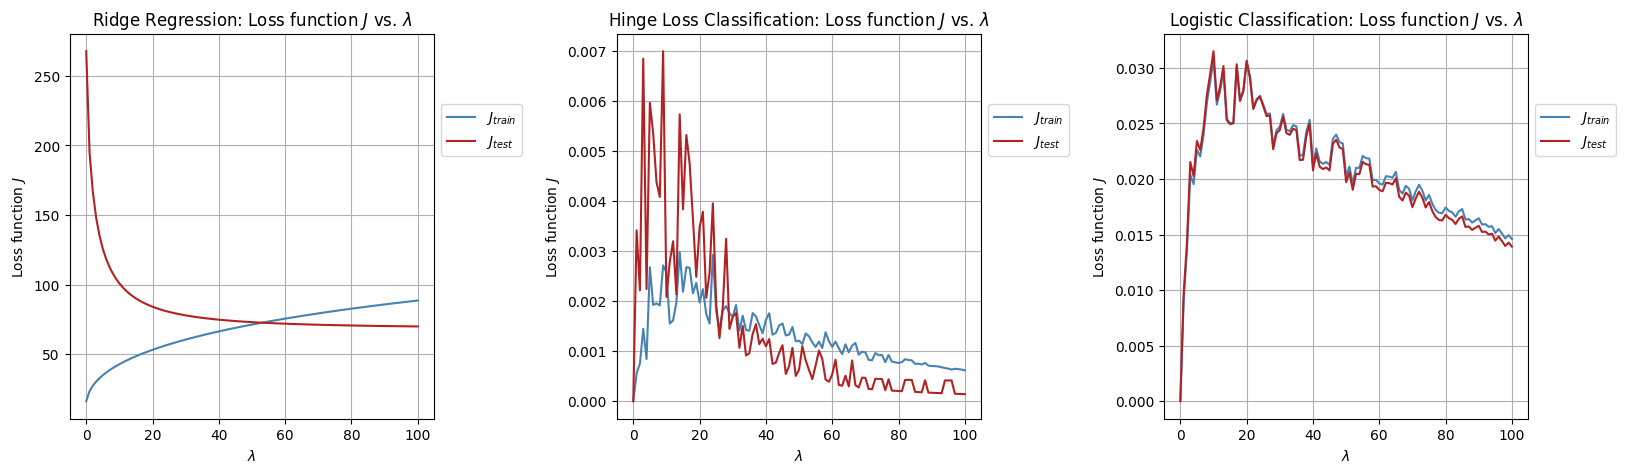

In [45]:


# Set matrix solver mode:
mode     = 'Cholesky'
method   = ['Ridge Regression', 'Hinge Loss Classification', 'Logistic Classification']

# Save fig:
save_fig  = True
fig_name  = 'machine_learning_output.png'
directory = 'img'

# Initialize lambda values:
lam_min = 0
lam_max = 1e2
N       = int(lam_max + 1)
lam_sim = np.linspace(lam_min, lam_max, N)
learning_rate = 0.01
train_steps = 500

# Initialize figs:
fig, axs = plt.subplots(1, len(method), figsize = (20, 5))

for j in range(len(method)):
    
    # Initialize arrays:
    J_train_sim = np.zeros(N)
    J_test_sim  = np.zeros(N)

    # Run simulations:
    for i in range(N):
        match method[j]:
            case 'Ridge Regression':
                J_train, J_test, _ = ML._ridge_regression(X_train, X_test, y_train, y_test, mode=mode, lam=lam_sim[i])

            case 'Hinge Loss Classification':
                model, train_loss_history, test_loss_history = ML._train_hinge_loss(
                    X_train, y_train, X_test, y_test, 
                    lam=lam_sim[i], 
                    learning_rate=learning_rate, 
                    train_steps=train_steps
                )
                # Get final loss from history lists
                J_train = train_loss_history[-1]
                J_test = test_loss_history[-1]

            case 'Logistic Classification':
                model, train_loss_history, test_loss_history = ML._train_logistic_loss(
                    X_train, y_train, X_test, y_test, 
                    lam=lam_sim[i], 
                    learning_rate=learning_rate, 
                    train_steps=train_steps
                )
                J_train = train_loss_history[-1]
                J_test = test_loss_history[-1]

        J_train_sim[i] = J_train
        J_test_sim[i] = J_test

        if (N - i) % 10 == 0:
            clear_output(wait=True)
            print(f'Iterations remaining: {N - i}')

    # Visualize results:
    axs[j].plot(lam_sim, J_train_sim, label = '$J_{train}$', color = 'steelblue')
    axs[j].plot(lam_sim, J_test_sim, label = '$J_{test}$', color = 'firebrick')

    box = axs[j].get_position()
    axs[j].set_position([box.x0, box.y0, box.width * 0.8, box.height])

    # Put a legend to the right of the current axis
    axs[j].legend(loc='center left', bbox_to_anchor=(1, 0.75))

    axs[j].grid()
    axs[j].set_xlabel('$\lambda$')
    axs[j].set_ylabel('Loss function $J$')
    axs[j].set_title(f'{method[j]}: Loss function $J$ vs. $\lambda$')

if save_fig:
    if not os.path.exists(directory):
        os.makedirs(directory)
    
    fig.savefig(directory + '/' + fig_name)

plt.show()

### 2.

**(a)** Logistic Regression and Hinge-Loss Classification  
- For the code, we kindly refer to the 'Machine_Learning' class.

**(b)** OLS, Ridge Regression, Logistic Regression, and Hinge-Loss Classification for Binary Classification  

We can see that in the base case there is no significant difference between the classifiers. They all perform quite well, with accuracies above 90%. The reason is that all models can efficiently separate linearly separable data when the data is modeled by a Gaussian distribution with equal class sizes and variance.

C:\Users\rogin\AppData\Local\Temp\ipykernel_12604\3249637704.py:58: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y[i] = np.sign(np.matmul(X[i, :].T, w))


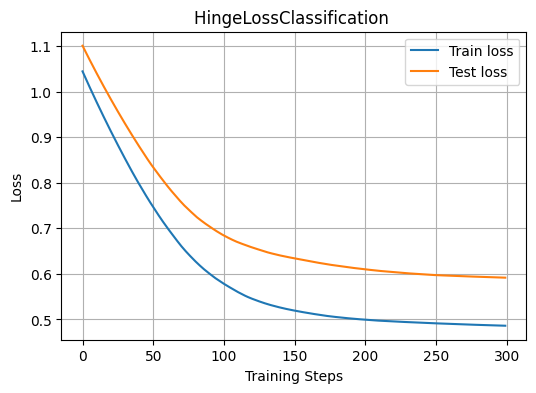

HingeLossClassification | Final Train Loss: 0.4862 | Final Test Loss: 0.5917


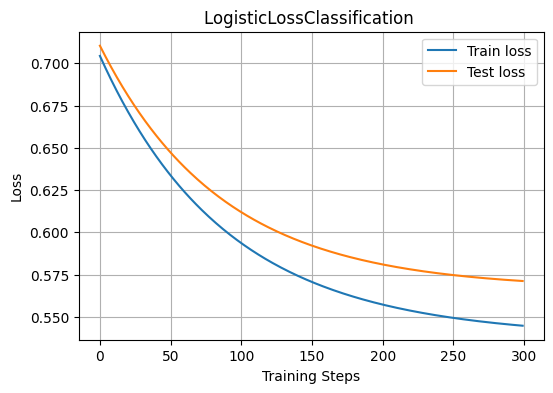

LogisticLossClassification | Final Train Loss: 0.5447 | Final Test Loss: 0.5712
Hinge-loss accuracy: 0.9166666666666666
Logistic-loss accuracy: 0.95
OLS accuracy: 0.9166666666666666
Ridge regression accuracy: 0.9333333333333333


In [46]:
# return number of missclassified samples
def misclassification(X, y, w):
    y = y.reshape(-1, 1)
    preds = np.sign(X @ w)
    return int(np.sum(preds != y))


dimension = 20
samples = 300
l = 0.3
lr = 0.01

X, _, y = data._data_generation_classifier(nrows=samples, ncols=dimension)

X_train, y_train, X_test, y_test = data._data_splitting(
    X=X, y=y, mode='ratio', nrows_train=0.8
)

train_steps = 300

hingeLoss = HingeLossClassification(dimension, l, lr)
logisticLoss = LogisticLossClassification(dimension, l, lr)  
losses = [hingeLoss, logisticLoss]

loss_history = [[] for _ in losses]
test_loss_history = [[] for _ in losses]

for step in range(train_steps):
    for i, loss_function in enumerate(losses):
        # compute test loss first (will set cache)
        test_loss = loss_function.forward(X_test, y_test)
        # compute train loss (overwrites cache to train data)
        loss = loss_function.forward(X_train, y_train)

        # compute gradients
        grad = loss_function.backward()     

        # apply optimization step  
        loss_function.step()

        loss_history[i].append(loss)
        test_loss_history[i].append(test_loss)

# plotting
for i, lf in enumerate(losses):
    plt.figure(figsize=(6,4))
    plt.plot(loss_history[i], label='Train loss')
    plt.plot(test_loss_history[i], label='Test loss')
    plt.xlabel('Training Steps')
    plt.ylabel('Loss')
    plt.title(f'{type(lf).__name__} ')
    plt.legend()
    plt.grid(True)
    plt.show()
    print(f"{type(lf).__name__} | Final Train Loss: {loss_history[i][-1]:.4f} | "
          f"Final Test Loss: {test_loss_history[i][-1]:.4f}")
    

accuracy = []
accuracy.append(misclassification(X_test, y_test, hingeLoss.weight[1:]))
accuracy.append(misclassification(X_test, y_test, logisticLoss.weight[1:]))



_, _, w = ML._ordinary_least_squares(X_train, X_test, y_train, y_test, mode=mode)
accuracy.append(misclassification(X_test, y_test,  w[1:].reshape(-1, 1)))

_, _, w = ML._ridge_regression(X_train, X_test, y_train, y_test, mode=mode, lam=60)
accuracy.append(misclassification(X_test, y_test, w[1:].reshape(-1, 1)))

print("Hinge-loss accuracy:", 1 - accuracy[0] / X_test.shape[0])
print("Logistic-loss accuracy:", 1 - accuracy[1] / X_test.shape[0])
print("OLS accuracy:", 1 - accuracy[2] / X_test.shape[0])
print("Ridge regression accuracy:", 1 - accuracy[3] / X_test.shape[0])



**(c)** To create a dataset on which OLS and ridge regression perform poorly while hinge-loss and logistic-loss perform well, we can use the following insight: OLS and ridge regression do not maximize the margin. Therefore, we can design the data so that these models place the decision boundary too close to one of the classes.

We can achieve this by:
- Making the classes different in size,
- Giving the classes different variances, and
- Introducing outliers (on the positive side, so the data remains linearly separable).

These factors cause OLS and ridge regression to shift the boundary toward the larger class, leading to more misclassifications.

We can observe that all models perform worse than in the previous question; however, hinge-loss and logistic-loss achieve accuracies that are about 15–20 percentage points higher than OLS and ridge regression.

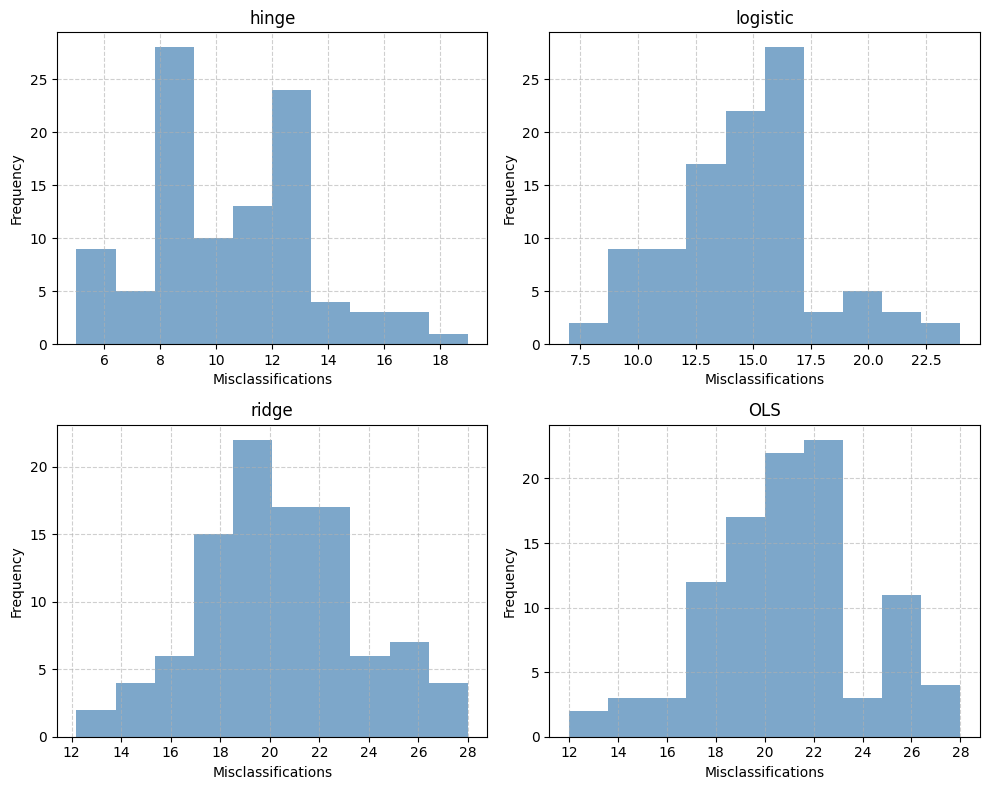

hinge average accuracy: 76.50%
logistic average accuracy: 66.64%
ridge average accuracy: 53.59%
OLS average accuracy: 52.70%


In [47]:
dimension = 20
samples = 300
l = 0.3
lr = 0.1
train_steps = 300

mode   = 'Cholesky'
methods = ['Ridge Regression', 'Ordinary Least Squares']  

lam_min, lam_max = 0.0, 1e2
N = int(lam_max + 1)                 
lam_sim = np.linspace(lam_min, lam_max, N)

random_samples = 100

# Data
# 2 clusters with different variences and sizes
# outliers(in the positive direction so still linearly separable) and small margin to make it harder for OLS
# Data generation:
# Creates a synthetic binary classification dataset designed to challenge linear models like OLS (Ordinary Least Squares)
#  while remaining linearly separable overall.

X, y, _ = data.make_ols_tricky_separable(
    n_pos=200,           # number of positive samples (class +1)
    n_neg=20,            # number of negative samples (class -1)
    ncols=dimension,     # number of input features (dimensionality of X)
    margin=0.15,         # minimum separation (margin) between positive and negative clusters
    scale_pos=1.5,       # variance scale (spread) of the positive cluster
    scale_neg=1.0,       # variance scale (spread) of the negative cluster
    outlier_frac=0.06,   # fraction of samples to turn into outliers
    outlier_multiplier=20.0,  # magnitude multiplier for outlier displacement
    seed=42              # random seed for reproducibility
)


# to store number of missclassified samples across the set number of iterations
misclassified = [[], [], [], []] 
labels = ['hinge', 'logistic', 'ridge', 'OLS']

for seed in range(random_samples):
    X_train, y_train, X_test, y_test = data._data_splitting(
        X=X, y=y, mode='ratio', nrows_train=0.8, seed=seed, random=True
    )

    # init models
    hingeLoss    = HingeLossClassification(dimension, l, lr)
    logisticLoss = LogisticLossClassification(dimension, l, lr)
    losses = [hingeLoss, logisticLoss]

    # train both losses
    for _ in range(train_steps):
        for lf in losses:
            # train loss forward
            _ = lf.forward(X_train, y_train)
            # backward (handle both return signatures)
            bw = lf.backward()
            # you can ignore returned grad; classes store it internally
            lf.step()

    # evaluate misclassification for trained classifiers
    misclassified[0].append(misclassification(X_test, y_test, hingeLoss.weight[1:]))
    misclassified[1].append(misclassification(X_test, y_test, logisticLoss.weight[1:]))

    # baselines across lambda grid
    # maybe replace with best lambda found earlier
    for m in methods:
        tot = 0
        if m == 'Ridge Regression':
            for k in range(N):
                _, _, w = ML._ridge_regression(
                    X_train, X_test, y_train, y_test, mode=mode, lam=lam_sim[k])
                tot += misclassification(X_test, y_test, w[1:].reshape(-1, 1))
            #average missclassification across lambdas
            misclassified[2].append(tot / N)

        elif m == 'Ordinary Least Squares':
            tot = 0
            for k in range(N):
                _, _, w = ML._ordinary_least_squares(
                    X_train, X_test, y_train, y_test, mode=mode)
                tot += misclassification(X_test, y_test,  w[1:].reshape(-1, 1))
            #average missclassification across lambdas
            misclassified[3].append(tot / N)


# Histograms
# Myabe change to values relative to test size
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes = axes.ravel()

for i, vals in enumerate(misclassified):
    axes[i].hist(vals, bins=10, color='steelblue', alpha=0.7)
    axes[i].set_title(labels[i])
    axes[i].set_xlabel('Misclassifications')
    axes[i].set_ylabel('Frequency')
    axes[i].grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

# --- Average accuracy across runs---
test_size = X_test.shape[0]  

avg_misclassified = [np.mean(vals) for vals in misclassified]
avg_accuracy = [1 - m / test_size for m in avg_misclassified]

for label, acc in zip(labels, avg_accuracy):
    print(f"{label} average accuracy: {acc:.2%}")
